<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/2.%20Shoppingmall_analysis/shopping_model_.ver2(log).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -r requirements.txt

  Cloning https://github.com/aib-contents/pytest-submit-plugin (to revision b011236541e17ea63810465e26b6a3d1561818b1) to c:\users\user\appdata\local\temp\pip-install-wc2av0hx\pytest-submit_0fd63556fac7432099599203c04bc108



  Running command git clone -q https://github.com/aib-contents/pytest-submit-plugin 'C:\Users\user\AppData\Local\Temp\pip-install-wc2av0hx\pytest-submit_0fd63556fac7432099599203c04bc108'
  remote: Repository not found.
  fatal: repository 'https://github.com/aib-contents/pytest-submit-plugin/' not found
ERROR: Could not find a version that satisfies the requirement pytest-submit (unavailable) (from versions: none)
ERROR: No matching distribution found for pytest-submit (unavailable)
You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


# 프로젝트 목적 

 쇼핑몰 입점 고객을 위한 상품 판매 예측 모델을 만들고, 입점한 고객이 자신의 상품을 입력했을때 판매예측결과와 자동으로 상품을 분석하여 최적화를 위한 방법을 제공하여 고객의 성공적인 판매를 돕기

< 컬럼 해석 >

|컬럼명|컬럼내용|
|-|-|
|tittle | 상품제목(유럽국가용으로 현지화된 제목)|
|tittle_orig | 원래 영어로된 상품 제목|
|Price |  제품가격|
|retail_price | 소비자 가격(소매가격)|
|currency_buyer | 가격의 통화|
|units_sold | 판매량|
|uses_ad_boosts | 판매자가 플랫폼내에서 광고나 상단고정과 같은 추가 비용 지불여부|
|rating | 평균 제품 등급|
|rating_count | 제품의 등급개수 총합|
|rating_five_count | 별5개등급|
|badges_count|배지 보유 개수|
|badge_local_product | 현지에서 생산된 제품 배지|
|badge_product_quality | 많은 구매자가 지속적으로 좋은 평가 했을때 수여되는 배지|
|badge_fast_shipping | 제품의 주문이 지속적으로 빠르게 배송될때 수여되는 배지|
|tags | 사용자가 설정한 태그 |
|product_color | 제품의 주요 색상|
|product_variation_size_id | 해당 제품의 변경 가능한 사이즈|
|product_variation_inventory | 판매자의 최대 허용 수량|
|shipping_option_name | 배송 옵션(표준배송 등등)|
|shipping_option_price | 배송비|
|shipping_is_express | 배송 급행 여부|
|countries_shipped_to | 상품이 배송가능 한 국가 설정수|
|inventory_total | 모든 제품 변형에 대한 총 재고(크기/ 색상 변형)|
|has_urgency_banner | 긴급한 베너가 있었는지|
|urgency_text | 검색 결과의 일부 제품 위에 나타나는 텍스트 베너|
|origin_country | 원산지|
|merchant_tittle | 판매자의 표시 이름(UI에 판매자 상품 이름으로 표시)|
|merchant_name | 판매자 이름|
|merchant_info_subtitle | 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트|
|merchant_rating_count | 이 판매자의 평가 수|
|merchant_rating | 상인의 평가|
|merchant_id | 판매자 고유 ID|
|merchant_has_profile_picture | merchant_profile_picture의 URL여부|
|merchant_profile_picture | 판매자의 프로필 사진 여부|
|product_url | 제품 페이지에 대한 URL|
|product_picture | 상품 사진 URL|
|product_id | 상품 id|
|theme | 웹사이트에서 상품검색시 사용하는 테마|
|crawl_month | 크롤링한 날짜|


# 1차 전처리

In [2]:
# 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# 데이터 불러오기
df = pd.read_csv('Raw_data.csv')
print(df.shape)
raw_df = df.copy()
df 

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1573개
--------------------------------------------------


merchant_profile_picture        86.0
has_urgency_banner              70.0
urgency_text                    70.0
rating_two_count                 3.0
rating_five_count                3.0
rating_four_count                3.0
rating_three_count               3.0
rating_one_count                 3.0
product_color                    3.0
origin_country                   1.0
product_variation_size_id        1.0
merchant_name                    0.0
merchant_info_subtitle           0.0
merchant_rating_count            0.0
merchant_title                   0.0
title                            0.0
merchant_rating                  0.0
countries_shipped_to             0.0
merchant_id                      0.0
merchant_has_profile_picture     0.0
product_url                      0.0
product_picture                  0.0
product_id                       0.0
theme                            0.0
inventory_total                  0.0
product_variation_inventory      0.0
shipping_is_express              0.0
r

## 결측값 처리

In [6]:
# 결측값 제거 

# 결측비율 70% 이상 컬럼 삭제
df = df.drop(columns = ['merchant_profile_picture', 'has_urgency_banner', 'urgency_text'])

# rating_one_count ~ _five_count 는 분석에 사용할 컬럼이며, 결측값이 작아서 삭제
list = []
for i in df[df['rating_one_count'].isnull() == True].index:
  list.append(i)
df = df.drop(index = list)

# origin_country의 대부분이 'CN'이므로 해당값으로 치환
df['origin_country'] = df['origin_country'].fillna('CN')

# 변경가능한 사이즈는 종류가 105개로 각기 다른기준으로 구분되어있어 컬럼을 삭제
df = df.drop(columns = 'product_variation_size_id')



print(f'결측값 제거후 남은 데이터의 수: {len(df)}')

결측값 제거후 남은 데이터의 수: 1528


In [7]:
# 상품색상 결측값 데이터 확인

# 앞선 결측값제거로 인한 인덱스 초기화
df = df.reset_index().drop(columns = 'index')

# 상품 색상 결측값 확인 
print(len(df.loc[df['product_color'].isna() == True]))

# 직접 url로 상품을 확인후 결측값을 채워준다.
df.loc[df['product_color'].isna() == True][['product_color','product_url']]

38


,product_color,product_url
26,NaN,https://www.wish.com/c/5b5edbae1e222732845e655f
30,NaN,https://www.wish.com/c/5c9d920da94960780239d468
146,NaN,https://www.wish.com/c/58e0f38f9bf29f55183efd0d
278,NaN,https://www.wish.com/c/5c935aa8778e8274b0bdcead
448,NaN,https://www.wish.com/c/5e70ba09e3d51e1002f7cf8e
486,NaN,https://www.wish.com/c/569de6363e68eb0d85e0cded
533,NaN,https://www.wish.com/c/56f640b461d6cf68cb5c5d83
570,NaN,https://www.wish.com/c/59636dbdc657d57012e8b3f3
572,NaN,https://www.wish.com/c/5ac302716931da0d71398f53
618,NaN,https://www.wish.com/c/5e7e0c35e27371898f419f5d


직접 상품의 링크에 접속해서 색깔정보를 채워넣기

In [8]:
# 상품색상 결측값 채우기
df.iloc[26,19] = 'white'
df.iloc[30,19]= 'black'
df.iloc[146,19] = 'rainbow'
df.iloc[278,19] = 'black'
df.iloc[486,19] = 'black'
df.iloc[533,19] = 'white'
df.iloc[570,19] = 'mintgreen'
df.iloc[572,19] = 'black'
df.iloc[623,19] = 'black'
df.iloc[624,19] = 'black'
df.iloc[645,19] = 'black'
df.iloc[673,19] = 'white'
df.iloc[712,19] = 'white'
df.iloc[818,19] = 'white'
df.iloc[855,19] = 'rainbow'
df.iloc[990,19] = 'mintgreen'
df.iloc[1008,19] = 'blue'
df.iloc[1033,19] = 'pink'
df.iloc[1067,19] = 'rainbow'
df.iloc[1072,19] = 'white & black'
df.iloc[1079,19] = 'white'
df.iloc[1085,19] = 'white'
df.iloc[1425,19] = 'white'

# 상품확인결과 기타 일반 물건에 의한 색상 구분이 어려워 삭제
df = df.drop(index = [448, 618, 690, 830, 944, 988, 997, 1004, 1083, 1152, 1301, 1330, 1427, 1431, 1463])

In [9]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1513개
--------------------------------------------------


merchant_name                   0.0
title                           0.0
merchant_info_subtitle          0.0
shipping_option_price           0.0
shipping_is_express             0.0
countries_shipped_to            0.0
inventory_total                 0.0
origin_country                  0.0
merchant_title                  0.0
merchant_rating_count           0.0
product_variation_inventory     0.0
merchant_rating                 0.0
merchant_id                     0.0
merchant_has_profile_picture    0.0
product_url                     0.0
product_picture                 0.0
product_id                      0.0
theme                           0.0
shipping_option_name            0.0
product_color                   0.0
title_orig                      0.0
rating_five_count               0.0
price                           0.0
retail_price                    0.0
currency_buyer                  0.0
units_sold                      0.0
uses_ad_boosts                  0.0
rating                      

In [10]:
# 판매자의 이름 결측값 처리
df.loc[df['merchant_name'].isnull()==True] # 판매자 이름의 결측값은 모두 같은 사람이므로 임시로 하나의 이름으로 채워준다.
df['merchant_name'] = df['merchant_name'].fillna('jeongseok') # 판매자 이름을 jeongseok으로 임시로 채워주었다.

## 사용하지 않는 컬럼 제거

In [11]:
# 유럽언어제목을 삭제한 후 영어제목을 title로 변경
df = df.drop(columns = 'title')
df.rename(columns={'title_orig':'title'},inplace=True)


# 소매가격과 실제가격의 차이만으로 의미를 찾을 수없다고 판단(더 많은 변수들과 복합적이기 때문)
df = df.drop(columns = ['retail_price'])

# 통화는 모두 EUR사용하기 때문에 삭제
df = df.drop(columns = ['currency_buyer'])




# 테마는 모두 여름이고, 크롤링 날짜 또한 같은날 진행하였기 때문에 삭제
df = df.drop(columns = ['theme', 'crawl_month'])

# URL은 모델에 사용할 수 있는 컬럼이 아니고 인사이트도 없기 때문에 제거
df = df.drop(columns = ['product_picture', 'product_url'])


# 판매자 이름은 판매자 id와 겹치므로 제거
df = df.drop(columns = ['merchant_name'])


# 필요없는 컬럼 삭제(merchant_info_subtitle,merchant_title : 불필요한 텍스트/ inventory_total : 사용하지 않을 결측값)
df = df.drop(columns = ['merchant_info_subtitle', 'inventory_total', 'merchant_title'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1513 non-null   object 
 1   price                         1513 non-null   float64
 2   units_sold                    1513 non-null   int64  
 3   uses_ad_boosts                1513 non-null   int64  
 4   rating                        1513 non-null   float64
 5   rating_count                  1513 non-null   int64  
 6   rating_five_count             1513 non-null   float64
 7   rating_four_count             1513 non-null   float64
 8   rating_three_count            1513 non-null   float64
 9   rating_two_count              1513 non-null   float64
 10  rating_one_count              1513 non-null   float64
 11  badges_count                  1513 non-null   int64  
 12  badge_local_product           1513 non-null   int64  
 13  bad

## 중복값 처리

In [12]:
df = df.drop_duplicates(keep = 'first')
df = df.reset_index()
df = df.drop(columns = 'index')
df

,title,price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,100,0,3.76,54,26.0,8.0,10.0,1.0,...,Livraison standard,4,0,34,CN,568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,...,Livraison standard,2,0,41,CN,17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,100,0,3.57,14,5.0,4.0,2.0,0.0,...,Livraison standard,3,0,36,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,5000,1,4.03,579,295.0,119.0,87.0,42.0,...,Livraison standard,2,0,41,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,100,1,3.10,20,6.0,4.0,2.0,2.0,...,Livraison standard,1,0,35,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,New Summer Fashion Trousers Women Leggings Rip...,3.00,100,1,3.79,57,25.0,10.0,13.0,3.0,...,Livraison standard,1,0,41,CN,4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c
1288,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,...,Livraison standard,2,0,44,CN,16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97
1289,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,10000,1,4.08,1367,722.0,293.0,185.0,77.0,...,Livraison standard,2,0,41,CN,5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1290,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,100,0,3.71,59,24.0,15.0,8.0,3.0,...,Livraison standard,2,0,11,CN,210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe


# 목적에 맞게 컬럼내용 수정

## 판매량(units_sold) 수정

5000개 이상 판매 시 성공적인 판매(successful_sold)

In [13]:
# unites_sold 값 확인
df['units_sold'].value_counts()

100       383
1000      357
5000      199
10000     163
20000      99
50         46
10         21
50000      16
100000      6
2           1
7           1
Name: units_sold, dtype: int64

In [14]:
# successful_sold컬럼으로 변경
sold_list = []
for i in df['units_sold']:
  if i >= 5000:
    sold_list.append(1)
  else:
    sold_list.append(0)

df['successful_sold'] = sold_list
df[['units_sold', 'successful_sold']]

,units_sold,successful_sold
0,100,0
1,20000,1
2,100,0
3,5000,1
4,100,0
...,...,...
1287,100,0
1288,20000,1
1289,10000,1
1290,100,0


In [15]:
df = df.drop(columns = ['units_sold'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

## 배송방법(shipping_option_name)수정

In [16]:
df['shipping_option_name'].value_counts()

Livraison standard         1238
Standard Shipping            18
Envio Padrão                  7
Envío normal                  4
Expediere Standard            4
الشحن القياسي                 3
Standardowa wysyłka           3
Standardversand               3
Livraison Express             2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
Standart Gönderi              2
Стандартная доставка          2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

|배송방법|배송형태|
|-|-|
|Livraison Express | **특급배송**|
|Ekspresowa wysyłka | **특급배송**|
|Livraison standard | 표준배송|
|Standard Shipping | 표준배송|
|Envio Padrão | 표준배송|
|Expediere Standard | 표준배송|
|Envío normal | 표준배송|
|الشحن القياسي | 표준배송|
|Standardversand | 표준배송|
|Standardowa wysyłka | 표준배송|
|Стандартная доставка | 표준배송|
|การส่งสินค้ามาตรฐาน | 표준배송|
|Standart Gönderi | 표준배송|
|Spedizione standard  | 표준배송|
|ការដឹកជញ្ជូនតាមស្តង់ដារ | 표준배송|


In [17]:
# 배송방법에서 -> 특급배송여부로 컬럼의 속성을 변경

shipping_list = []
special = ['Livraison Express', 'Ekspresowa wysyłka']

for i in df['shipping_option_name']:
  if i in special:
    shipping_list.append(1)
  else:
    shipping_list.append(0)

df['shipping_option_name'] = shipping_list
df['shipping_option_name'].value_counts()

0    1289
1       3
Name: shipping_option_name, dtype: int64

In [18]:
df.rename(columns = {'shipping_option_name':'quick_shipping'},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

## 배송급행여부(shipping_is_express)수정

In [19]:
df['shipping_is_express'].value_counts()

0    1289
1       3
Name: shipping_is_express, dtype: int64

In [20]:
df.loc[df['quick_shipping']==1]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
600,New Sexy Women Strap Backless Pajamas Lingerie...,8.0,0,2.79,14,5.0,1.0,0.0,2.0,6.0,...,7,1,41,CN,7012,4.336708,587dd9a883eee74e06b30974,0,5aabae5e7ddb066f389e4e7b,0
678,Summer Women's Fashion Sleeveless V-neck backl...,49.0,0,4.67,6,4.0,2.0,0.0,0.0,0.0,...,12,1,41,CN,29977,4.223138,5925555b2cd9447854443c41,0,5d09ecc2f5d4eb7721203368,0
925,Sexy Women Camouflage Print Bandage Push-up Sw...,6.0,0,4.29,2808,1789.0,459.0,300.0,110.0,150.0,...,7,1,39,CN,33675,4.314150,5577b101429aa92940bc33e7,0,588c54fb6661e84246a8aa71,1


배송급행여부는 배송방법의 특급배송과 같으므로 다중공선성문제가 생기기 때문에 삭제해준다.

In [21]:
df.drop(columns=['shipping_is_express'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

## 배송가능한 국가 수 (countries_shipped_to) 수정

In [22]:
np.sort(df['countries_shipped_to'].unique())

array([  6,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  78,  79,  80,  81,  82,  83,  84,  90,  91,  93,
        94, 104, 105, 107, 109, 111, 118, 124, 125, 127, 132, 135, 137,
       138, 139, 140], dtype=int64)

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='countries_shipped_to'>

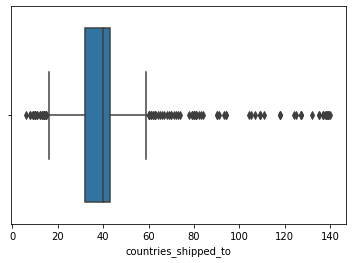

In [23]:
sns.boxplot(df['countries_shipped_to'])

In [24]:
print(df['countries_shipped_to'].median())
print(df['countries_shipped_to'].mean())

40.0
40.52244582043344


중간값과 평균값이 비슷한 것으로 보아 극히 일부가 이상치로 포함되어 있으므로 중간값을 기준으로 해서 배송범위가 매우 넓음여부로 변경

In [25]:
country_list = []

for i in df['countries_shipped_to']:
  if i > 40:
    country_list.append(1)
  else:
    country_list.append(0)

df['countries_shipped_to'] = country_list
df['countries_shipped_to'].value_counts()

# 배송범위 매우넓음(40 초과): 1, 배송범위 매우넓지는 않음(40이하) : 0

0    707
1    585
Name: countries_shipped_to, dtype: int64

In [26]:
df.rename(columns = {'countries_shipped_to':'shipped_range'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

## 원산지(origin_country) 수정

In [27]:
df['origin_country'].value_counts()

CN    1259
US      27
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [28]:
# 1513개의 데이터중 1474개가 중국이므로 중국과 아닌것으로 변환

origin_list = []

for i in df['origin_country']:
  if i == 'CN':
    origin_list.append(1)
  else:
    origin_list.append(0)

df.rename(columns={'origin_country':'made_in_china'},inplace=True)
df['made_in_china'] = origin_list
df['made_in_china'].value_counts()

1    1259
0      33
Name: made_in_china, dtype: int64

## 평가(rating)수정

In [29]:
# rating이 너무 다양하게 있어서 소수점 첫째자리 까지 수정
df['rating'] = round(df['rating'],1)
df['rating'].unique()

array([3.8, 3.4, 3.6, 4. , 3.1, 5. , 3.5, 3.3, 3.9, 3.7, 4.2, 4.3, 4.1,
       4.4, 2.8, 1.5, 3. , 3.2, 2.7, 4.5, 2.6, 4.8, 4.6, 2.5, 2.9, 2. ,
       1. , 4.7, 2.2, 2.3, 2.4])

# 가설검정

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   int64  
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

## 가설1. 광고를 넣으면 판매가 더 잘될것이다.

	 성공판매 실패 시 광고 사용 여부에 따른 비율 : 0.83 % 	 성공판매시 광고 사용 여부에 따른 비율 : 0.69 %


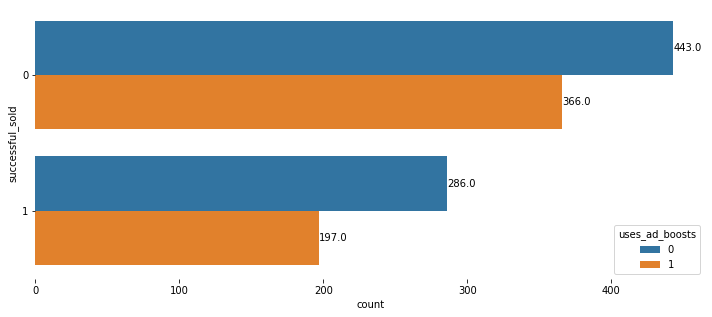

In [31]:
plt.figure(figsize = (12,5))
ax = sns.countplot(y = df['successful_sold'], hue = df['uses_ad_boosts'])
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1, y+height/2, (width), va='center')

plt.sca(ax)
plt.box(False)

print('\t','성공판매 실패 시 광고 사용 여부에 따른 비율 :', round(366/443,2),'%','\t','성공판매시 광고 사용 여부에 따른 비율 :', round(197/286,2),'%')

광고를 넣었다고해서 성공적인 판매로 이어지는것은 아니다.

## 가설2. 평가수 가 많을수록 높은 판매량을 기록할 것이다.

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating_count'>

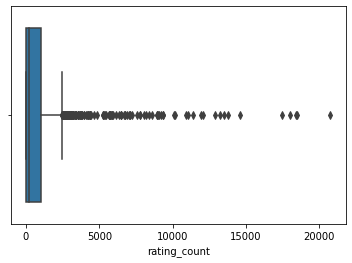

In [32]:
# 이상치 확인
sns.boxplot(df['rating_count'])

<AxesSubplot:>

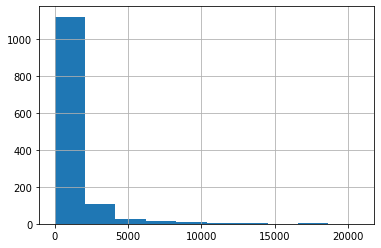

In [33]:
df['rating_count'].hist()

<AxesSubplot:>

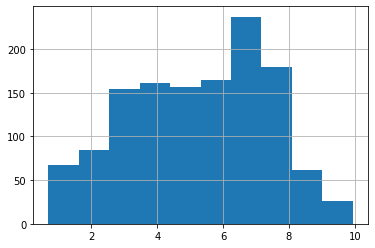

In [34]:
# 로그변환
df['rating_count'] = np.log1p(df['rating_count'])

df['rating_count'].hist()

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='successful_sold', ylabel='rating_count'>

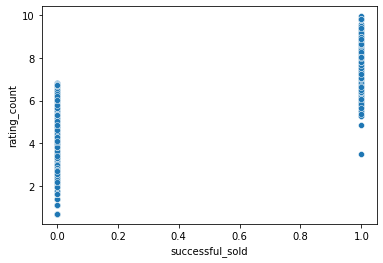

In [35]:
sns.scatterplot(df['successful_sold'],df['rating_count'])

rating_count의 경우 자연발생적 이상치 이기때문에 나중에 데이터셋을 분리하여 각각을 정규화 혹은 표준화 해줄것이다. (이상치가 크기때문에 이에 맞는 정규화 혹은 표준화 방법 사용할것)


c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


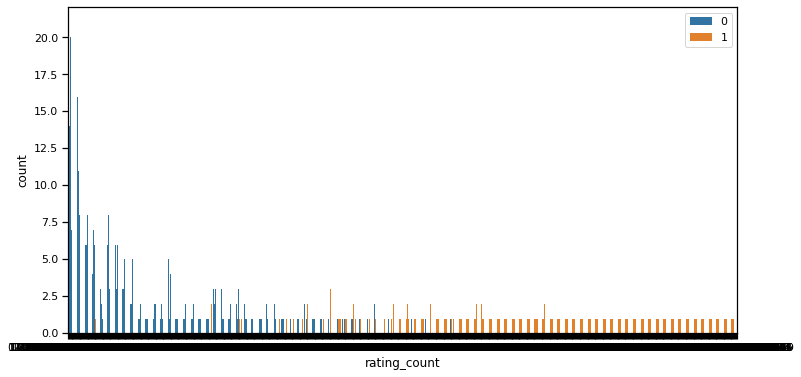

In [36]:
plt.figure(figsize =(12, 6))
sns.set_context('notebook')
sns.countplot(df['rating_count'], hue = df['successful_sold'])

ax =plt.gca()
ax.legend(loc = 'upper right')
plt.show()

<AxesSubplot:xlabel='rating_count', ylabel='successful_sold'>

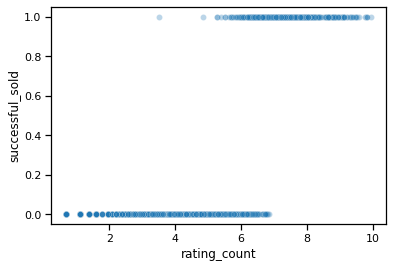

In [37]:
sns.scatterplot(x = df['rating_count'], y = df['successful_sold'], alpha = 0.3)

In [38]:
rating = pd.DataFrame(df.groupby(df['rating_count'])['successful_sold'].sum())
rating = rating.reset_index()
rating

,rating_count,successful_sold
0,0.693147,0
1,1.098612,0
2,1.386294,0
3,1.609438,0
4,1.791759,0
...,...,...
753,9.766808,1
754,9.797071,1
755,9.819780,1
756,9.823578,1


In [39]:
for i, j in enumerate(rating['successful_sold']):
  if j == 1:
    r_list = rating.iloc[i,0]
    print(r_list)
  else:
    print('********************************')

********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
********************************
**********

평가수가 많아질 수록 성공할 확률이 높아진다.

## 가설3. 평가수가 많은 사람들은 뱃지를 가지고 있을것이다. < - > 뱃지를 가지고 있는사람은 평가수가 높을것이다.

<AxesSubplot:xlabel='badges_count', ylabel='rating_count'>

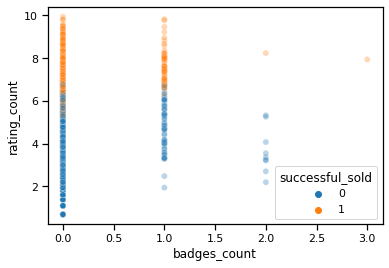

In [40]:
sns.scatterplot(x = df['badges_count'], y = df['rating_count'], hue = df['successful_sold'],alpha = 0.3)

평가수가 많다고 해서 뱃지를 가지고 있을것이라는것은 비례하지않다.

오히려 rating_count에 따라 구분되는 모습이 잘보인다.

## 가설4. 평점이 높을수록 판매량이 높을 것이다.

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


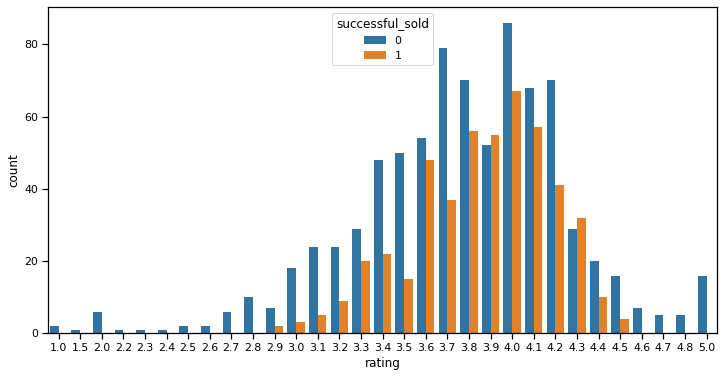

In [41]:
plt.figure(figsize = (12,6));
sns.countplot(df['rating'], hue = df['successful_sold']);

평점이 무조건 높다고 성공적인 판매를 기록하는것은 아닌것 같다. 그 이유는 무엇일까??

In [42]:
df[df['rating']==5.0]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,quick_shipping,shipping_option_price,shipped_range,made_in_china,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,65,3.507692,5e4b9c3801ba9d210036fc5a,0,5ec645bafd107a02279c8c54,0
61,Women s New Fashion Solid Color Pants Loose Ca...,5.00,1,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,...,0,1,0,1,9,3.666667,5e4b6a0c57cc9b0b53e499a4,0,5eba6ecb9a9e129fb97b5dfd,0
116,Summer Casual Front Knot Cotton Sleeveless Irr...,7.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,...,0,2,1,1,9703,3.970731,5a9e4f25e05388149703d9c8,0,5edf1267c771c4255ceee25d,0
123,Ladies Summer Tie Dye Print Short Sleeve Off S...,5.00,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,...,0,2,1,1,4,3.750000,5e6771b33cce5a8dd4f6fd3c,0,5ed868776a5a342472182986,0
202,Short Sleeve Beach Dress Women Summer Print V ...,8.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,...,0,2,0,1,127,3.874016,5eb51ed929e7865dc268a561,0,5ec1e63f7abee20ab93c68f2,0
287,Fashion Crop Top for Women Spaghetti Strap V N...,5.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,...,0,2,1,1,5316,4.224605,5b507899ab577736508a0782,0,5ea27636bea0a409031ae82f,0
292,Summer New Europe and The United States Sexy R...,8.00,0,5.0,2.639057,13.0,0.0,0.0,0.0,0.0,...,0,2,0,1,138,3.659420,5d50fb2b1d9a8e23e3334c81,0,5ef0ef11f30aba4e22166d4b,0
306,Anti-Fog Summer Swimming Full Face Mask Surfac...,14.00,0,5.0,0.693147,1.0,0.0,0.0,0.0,0.0,...,0,3,1,1,9217,4.173050,569f3031b3d90139e3c5a407,0,5e90074a5dd4013b350b81e4,0
345,2020 New Upgrade 170/150/100/30CM Inflatable S...,11.00,0,5.0,1.386294,3.0,0.0,0.0,0.0,0.0,...,0,2,1,1,299,4.247492,5d58d3b433f0b4349bbe941f,0,5ed3bc0f48c418059f206943,0
702,2020 Summer Men's Classic Shorts Multi-pocket ...,7.00,0,5.0,1.098612,2.0,0.0,0.0,0.0,0.0,...,0,2,0,1,46,3.608696,5e2ecb9deed5087a7ba2f5f7,0,5eeef4c4066647a9388a8ac2,0


c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='rating_count'>

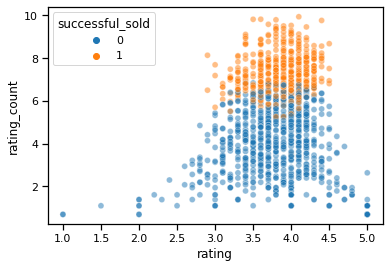

In [43]:
sns.scatterplot(df['rating'], df['rating_count'],hue = df['successful_sold'] ,alpha =0.5)

평점이 5점인 것의 총 평가 수를 보면 극히 일부의 고객이 5점을 평가한것으로 정말 소수가 5점을 주어서 평균 평점이 5점으로 나온것으로 확인이 된다. 따라서 평점이 무조건 높다고 판매가 잘되는것은 아니다. 하지만, 평점이 3.0밑으로 떨어지게 되면 성공적인 판매로 이어지지 않는것을 볼 수있다. 

## 가설5. 뱃지가 많을 수록 판매량이 높을 것이다.

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='badges_count', ylabel='successful_sold'>

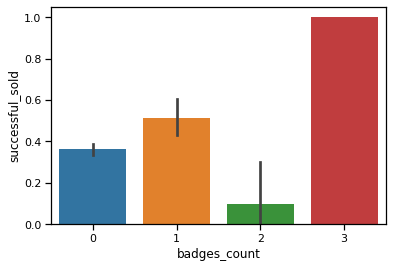

In [44]:
sns.barplot(df['badges_count'], df['successful_sold'])

In [45]:
print('뱃지0개',len(df[df['badges_count']==0]))
print('뱃지1개',len(df[df['badges_count']==1]))
print('뱃지2개',len(df[df['badges_count']==2]))
print('뱃지3개',len(df[df['badges_count']==3]))

뱃지0개 1160
뱃지1개 121
뱃지2개 10
뱃지3개 1


In [46]:
pd.DataFrame(df.groupby('badges_count')['successful_sold'].sum())

,successful_sold
badges_count,
0,419
1,62
2,1
3,1


In [47]:
# 정규성 검정
from scipy import stats

x = df.loc[df['badges_count']==0]['successful_sold']
y = df.loc[df['badges_count']==1]['successful_sold']
z = df.loc[df['badges_count']==2]['successful_sold']

print(stats.ks_2samp(x, y), stats.ks_2samp(x,z), stats.ks_2samp(y, z), sep = '\n')

KstestResult(statistic=0.15118979766315188, pvalue=0.011808591312834738)
KstestResult(statistic=0.26120689655172413, pvalue=0.4358661303464999)
KstestResult(statistic=0.412396694214876, pvalue=0.061010641852355274)


In [48]:
stats.kruskal(x, y, z)

KruskalResult(statistic=13.91318002014446, pvalue=0.0009523385086404081)

In [49]:
import scikit_posthocs as sp
sp.posthoc_conover(df,
                   val_col = 'successful_sold',
                   group_col = 'badges_count',
                   p_adjust = 'holm')

,0,1,2,3
0,1.000000,0.006265,0.300163,0.370336
1,0.006265,1.000000,0.046838,0.370336
2,0.300163,0.046838,1.000000,0.300163
3,0.370336,0.370336,0.300163,1.000000


귀무가설 기각 -> 뱃지들의 평균의 차이가 없을 가능성은 적다. 따라서 뱃지들의 평균의 차이가 난다고 가정했을때 뱃지의 개수가 늘어날수록 성공판매비율이 선형적으로 상승하지 않기 때문에 뱃지가 많다고 성공판매확률이 올라가지는 않는다.

In [50]:
# from scipy import stats
# from scipy.stats import shapiro

# w = df.loc[df['badges_count']==0]['successful_sold']
# x = df.loc[df['badges_count']==1]['successful_sold']
# y = df.loc[df['badges_count']==2]['successful_sold']
# z = df.loc[df['badges_count']==3]['successful_sold']

# print('뱃지0', stats.shapiro(w))
# print('뱃지1', stats.shapiro(x))
# print('뱃지2', stats.shapiro(y))
# print('뱃지3', stats.shapiro(z))

In [51]:
#stats.kruskal(w, x, y,z)

In [52]:
# import scikit_posthocs as sp
# sp.posthoc_conover(df,
#                    val_col = 'successful_sold',
#                    group_col = 'badges_count',
#                    p_adjust = 'holm')

In [53]:
#sns.barplot(df['badge_local_product'], df['successful_sold'])

In [54]:
#sns.barplot(df['badge_product_quality'], df['successful_sold'])

In [55]:
#sns.barplot(df['badge_fast_shipping'], df['successful_sold'])

## 가설6. 인기있는 태그 와 태그분석



In [56]:
# 각각의 태그 추출
tag_list = []
for tag_dummies in df['tags']:
  tags = str(tag_dummies).split(',')
  for tag in tags:
    tag_list.append(tag)

tag_list

['Summer',
 'Fashion',
 'womenunderwearsuit',
 'printedpajamasset',
 'womencasualshort',
 "Women's Fashion",
 'flamingo',
 'loungewearset',
 'Casual',
 'Shirt',
 'casualsleepwear',
 'Shorts',
 'flamingotshirt',
 'Elastic',
 'Vintage',
 'Tops',
 'tshirtandshortsset',
 'Women',
 'Sleepwear',
 'Print',
 'womenpajamasset',
 'womennightwear',
 'Pajamas',
 'womensleepwearset',
 'Mini',
 'womens dresses',
 'Summer',
 'Patchwork',
 'fashion dress',
 'Dress',
 'Mini dress',
 "Women's Fashion",
 'Women S Clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'Casual',
 'Summer',
 'cardigan',
 'women beachwear',
 'chiffon',
 'Sexy women',
 'Coat',
 'summercardigan',
 'openfront',
 'short sleeves',
 'Swimsuit',
 "Women's Fashion",
 'leaf',
 'Green',
 'printed',
 'Spring',
 'longcardigan',
 'Women',
 'Beach',
 'kimono',
 'Summer',
 'Shorts',
 'Cotton',
 'Cotton T Shirt',
 'Sleeve',
 'printedletterstop',
 'Clothing',
 'Tops',
 'Necks',
 'short sleeves',
 "Women's Fashion",
 'W

In [57]:
# 태그 빈도수 집계
from collections import Counter
tag_counts = Counter(tag_list)

# 빈도수 기준 50개 추출
tag_counts.most_common(50)

[("Women's Fashion", 1090),
 ('Summer', 1063),
 ('Fashion', 901),
 ('Women', 802),
 ('Casual', 738),
 ('Plus Size', 524),
 ('sleeveless', 471),
 ('Dress', 446),
 ('Shorts', 445),
 ('Tops', 426),
 ('sexy', 279),
 ('Beach', 270),
 ('Sleeve', 244),
 ('short sleeves', 241),
 ('Shirt', 238),
 ('Print', 238),
 ('Tank', 220),
 ('T Shirts', 203),
 ('V-neck', 198),
 ('printed', 197),
 ('Necks', 196),
 ('tank top', 189),
 ('Cotton', 186),
 ('summer dress', 175),
 ('Ladies', 173),
 ('blouse', 166),
 ('pants', 157),
 ('Vest', 154),
 ('Loose', 152),
 ('Floral', 148),
 ('beach dress', 147),
 ('Lace', 144),
 ('women dress', 140),
 ('Mini dress', 138),
 ('slim', 135),
 ('Mini', 128),
 ('Sleeveless dress', 127),
 ('Women Fashion', 122),
 ('party', 118),
 ('casual dress', 113),
 ('Waist', 110),
 ('Party Dress', 109),
 ('long dress', 106),
 ('Round neck', 106),
 ('Spaghetti', 95),
 ('Floral print', 91),
 ('backless', 88),
 ('Slim Fit', 88),
 ('Sport', 85),
 ('jumpsuit', 82)]

<AxesSubplot:xlabel='counts', ylabel='tags'>

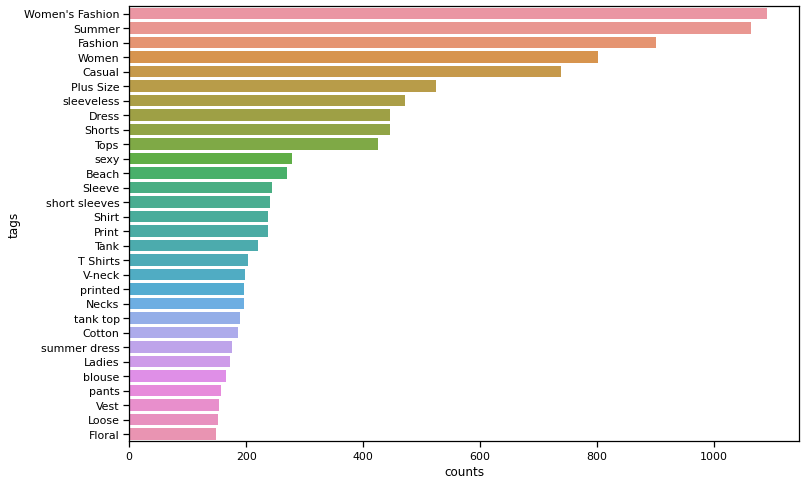

In [58]:
# visualization
tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (12,8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

(-0.5, 799.5, 399.5, -0.5)

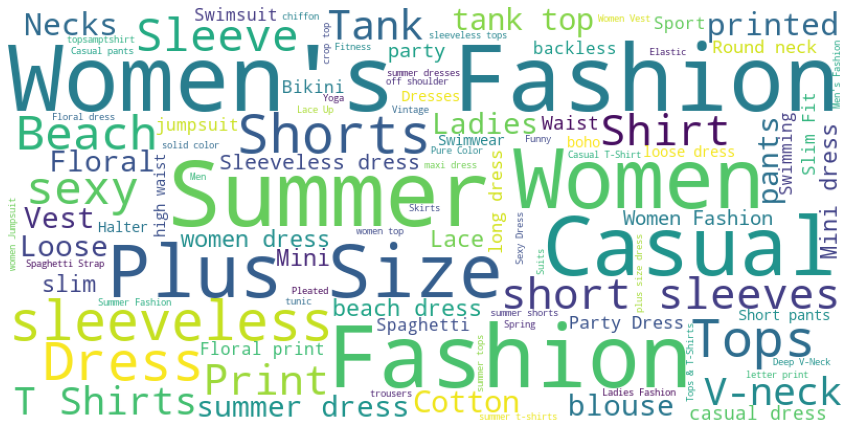

In [59]:
from wordcloud import WordCloud
import platform

wordcloud = WordCloud(background_color = 'white',
                       max_words = 100,
                       relative_scaling =0.3,
                       width = 800,
                       height = 400).generate_from_frequencies(tag_counts)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

Wonmen's Fashion과 Summer가 가장많이 사용되는 태그이며, 가장 빈번하게 나오는 태그인 이 두개(Women's Fashion, Summer)는 삭제한다. 그 이유는 필요한 상품을 태그 검색을 통하여 더욱 쉽게 찾고, 무분별한 태그의 사용으로 인한 최적화방해를 제거하기 위함.

## 가설7. 시즌이 여름이기 때문에 밝은 색의 상품이 판매량이 높을 것이다.

In [60]:
df.groupby('product_color')['successful_sold'].mean().sort_values(ascending = False).head(60)

product_color
burgundy            1.000000
ivory               1.000000
watermelonred       1.000000
denimblue           1.000000
light green         1.000000
blue & pink         1.000000
gold                1.000000
black & stripe      1.000000
navy blue           1.000000
star                1.000000
rosegold            1.000000
lightkhaki          1.000000
navyblue & white    1.000000
white & red         1.000000
jasper              1.000000
whitestripe         1.000000
army green          1.000000
wine red            1.000000
nude                1.000000
Blue                1.000000
floral              0.800000
camouflage          0.666667
black & white       0.666667
lightpink           0.666667
White               0.666667
white & black       0.666667
skyblue             0.500000
khaki               0.500000
pink & grey         0.500000
dustypink           0.500000
coolblack           0.500000
black & yellow      0.500000
Pink                0.500000
whitefloral         0.500000


위의 자료는 색상에 해당하는 상품의 갯수에 영향을 받으므로 충분한 지표가 되지 못한다.

In [61]:
# 색상별 집계
color = Counter(df['product_color'])
color

Counter({'white': 206,
         'green': 75,
         'leopardprint': 1,
         'black': 264,
         'yellow': 77,
         'navyblue': 25,
         'blue': 83,
         'beige': 14,
         'grey': 64,
         'lightblue': 8,
         'orange': 22,
         'red': 78,
         'Black': 3,
         'armygreen': 23,
         'pink': 85,
         'khaki': 10,
         'red & blue': 1,
         'blue & pink': 1,
         'RED': 1,
         'white & green': 7,
         'winered': 23,
         'black & green': 3,
         'purple': 48,
         'whitefloral': 2,
         'floral': 5,
         'fluorescentgreen': 2,
         'orange & camouflage': 1,
         'lightyellow': 2,
         'coolblack': 2,
         'multicolor': 18,
         'camouflage': 3,
         'lightpink': 3,
         'pink & black': 2,
         'silver': 2,
         'Army green': 1,
         'lightgreen': 3,
         'rainbow': 4,
         'mintgreen': 4,
         'pink & grey': 2,
         'gray': 9,
         'coff

<AxesSubplot:xlabel='color_name', ylabel='counts'>

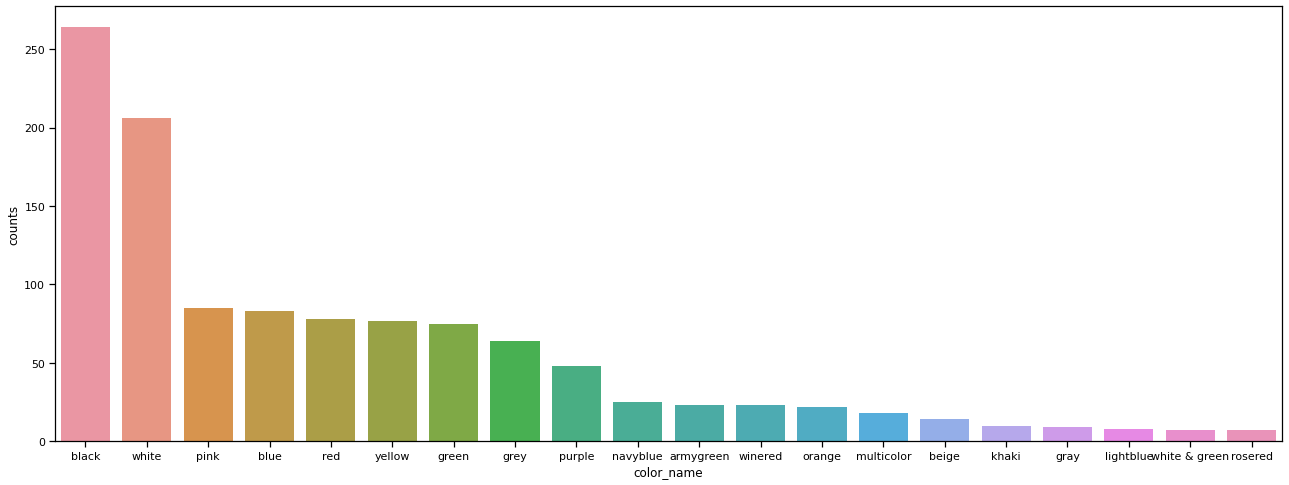

In [62]:
# 가장 많이 가지고 있는 제품의 색상 20가지 시각화

tag_counts_df = pd.DataFrame(color.most_common(20))
tag_counts_df.columns = ['color_name', 'counts']

sns.set_context('notebook')
plt.figure(figsize = (22,8))
sns.barplot(x = 'color_name', y = 'counts', data = tag_counts_df)

가장 많은 색상 20가지를 뽑은 이유는 정말 적은 수량의 상품을 판매했을경우 수치적으로 해석의 오류를 저지르기 때문이다. 하지만 top20에서도 소량이 많기 때문에 50개 이상만 선별하고자 한다.

In [63]:
# 가장많은 색상별 판매비율
top_color = ['black', 'white', 'pink', 'blue', 'red', 'yellow','green', 'grey', 'purple']
for i in top_color:
  print(i,':',int(round(df[df['product_color']==i]['successful_sold'].mean(),2)*100),'%')

black : 42 %
white : 42 %
pink : 32 %
blue : 35 %
red : 33 %
yellow : 19 %
green : 32 %
grey : 44 %
purple : 46 %


purlple -> grey -> white, black -> blue -> red-> pink-> green->yellow순서이다. 무조건 밝은 상품이라고 무조건 잘 팔리는것은 아니지만 밝은 색상이 상위권에 많이 분포되어 있다고는 볼 수 있다.

## 가설8. 배송비가 판매량에 영향을 미칠 것이다.

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='shipping_option_price', ylabel='count'>

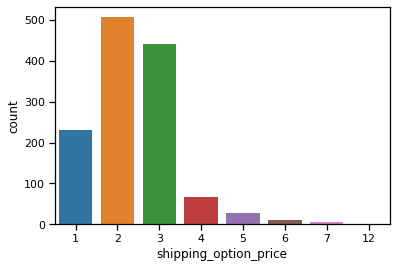

In [64]:
sns.countplot(df['shipping_option_price'])

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='shipping_option_price', ylabel='count'>

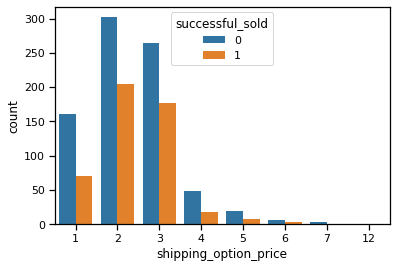

In [65]:
sns.countplot(df['shipping_option_price'],hue = df['successful_sold'])

In [66]:
  df['shipping_option_price'].value_counts()

2     507
3     442
1     232
4      67
5      28
6      10
7       5
12      1
Name: shipping_option_price, dtype: int64

In [67]:
df.groupby('shipping_option_price')['successful_sold'].mean().sort_values(ascending = False)

shipping_option_price
2     0.404339
3     0.400452
1     0.306034
6     0.300000
5     0.285714
4     0.268657
7     0.200000
12    0.000000
Name: successful_sold, dtype: float64

In [68]:
df[df['shipping_option_price']==3]['successful_sold']

2       0
7       0
15      0
18      1
20      1
       ..
1275    0
1278    1
1279    0
1281    1
1282    1
Name: successful_sold, Length: 442, dtype: int64

In [69]:
# 정규성 검정
from scipy import stats

a = df[df['shipping_option_price']==1]['successful_sold']
b = df[df['shipping_option_price']==2]['successful_sold']
c = df[df['shipping_option_price']==3]['successful_sold']
d = df[df['shipping_option_price']==4]['successful_sold']
e = df[df['shipping_option_price']==5]['successful_sold']
f = df[df['shipping_option_price']==6]['successful_sold']
g = df[df['shipping_option_price']==7]['successful_sold']
h = df[df['shipping_option_price']==12]['successful_sold']


print(stats.ks_2samp(a, b)[1], stats.ks_2samp(a, c)[1], stats.ks_2samp(a, d)[1], stats.ks_2samp(a, e)[1],stats.ks_2samp(a, f)[1],
      stats.ks_2samp(a, g)[1], stats.ks_2samp(a, h)[1],stats.ks_2samp(a, h)[1],stats.ks_2samp(b, c)[1],stats.ks_2samp(b, d)[1],
      stats.ks_2samp(b, e)[1],stats.ks_2samp(b, f)[1],stats.ks_2samp(b, g)[1],stats.ks_2samp(b, h)[1],stats.ks_2samp(c, d)[1],stats.ks_2samp(c, e)[1],
      stats.ks_2samp(c, f)[1],stats.ks_2samp(c, g)[1],stats.ks_2samp(c, h)[1],stats.ks_2samp(d, e)[1],stats.ks_2samp(d, f)[1],
      stats.ks_2samp(d, g)[1],stats.ks_2samp(d, h)[1],stats.ks_2samp(e, f)[1],stats.ks_2samp(e, g)[1],stats.ks_2samp(e, h)[1],
      stats.ks_2samp(f, g)[1],stats.ks_2samp(f, h)[1],stats.ks_2samp(g, h)[1],sep = '\n')

0.08487578498979487
0.1224633153875414
0.9999949806319294
1.0
1
0.9999999819155622
1
1
1.0
0.2045552256287686
0.805033046537033
0.9993311169553041
0.9561324150218331
1
0.24033077640701805
0.8380954474097908
0.999664657797618
0.9624571255467042
1
1
1
1
1
1
1
1
1
1
1


In [70]:
# 등분산검정
stats.levene(a, b, c, d, e, f, g, h)

LeveneResult(statistic=1.9339277430523083, pvalue=0.06097351002511399)

In [71]:
stats.f_oneway(a, b, c, d, e, f, g, h)

F_onewayResult(statistic=1.9339277430523072, pvalue=0.06097351002511399)

In [72]:
# 시각화에서 유사해 보이는 b와 c의 평균의 차이를 t검정으로 비교
stats.ttest_ind(b, c)

Ttest_indResult(statistic=0.12166291374406095, pvalue=0.9031917960916641)

b, c는 귀무가설이 채택되어 두 집단 b와 c의 평균의 차이는 없을 가능성이 높다.

In [73]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = df['successful_sold'],
                     groups = df['shipping_option_price'] )
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0983 0.1685 -0.0179 0.2145  False
     1      3   0.0944 0.2361 -0.0244 0.2132  False
     1      4  -0.0374    0.9 -0.2407 0.1659  False
     1      5  -0.0203    0.9 -0.3135 0.2729  False
     1      6   -0.006    0.9 -0.4794 0.4673  False
     1      7   -0.106    0.9 -0.7685 0.5565  False
     1     12   -0.306    0.9 -1.7749 1.1628  False
     2      3  -0.0039    0.9 -0.0993 0.0915  False
     2      4  -0.1357 0.3773 -0.3262 0.0548  False
     2      5  -0.1186    0.9 -0.4032 0.1659  False
     2      6  -0.1043    0.9 -0.5724 0.3637  False
     2      7  -0.2043    0.9  -0.863 0.4544  False
     2     12  -0.4043    0.9 -1.8715 1.0628  False
     3      4  -0.1318 0.4297  -0.324 0.0604  False
     3      5  -0.1147    0.9 -0.4004 0.1709  False
     3      6  -0.1005    0.9 -0.5692 0.3683  False
     3      

meandiff = group2 - group1

p-adj = P-value

reject = 귀무가설기각 : True, 채택 : False

귀무가설 채택(기각되지 않을 가능성이 높다) : 평균의 차이는 같을 가능성이 높다 따라서 배달비용에 따른 판매량의 차이는 없을 가능성이 높다

배송비는 판매량에 영향을 미치지 않는다.

<AxesSubplot:>

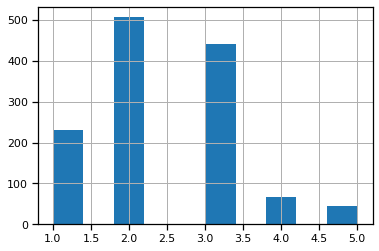

In [74]:
list =[]
for i in df['shipping_option_price']:
  if i >= 5:
    list.append(5)
  else:
    list.append(i)

df['shipping_option_price'] = list
df['shipping_option_price'].hist()

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='shipping_option_price', ylabel='count'>

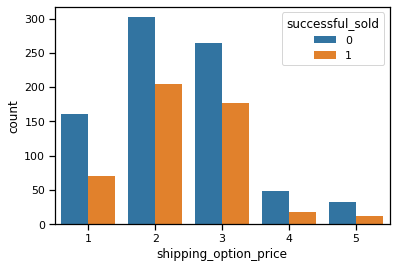

In [75]:
sns.countplot(df['shipping_option_price'],hue= df['successful_sold'])

## 가설9.	빠른 배송 상품이 판매량에 영향을 미칠것이다.

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quick_shipping', ylabel='count'>

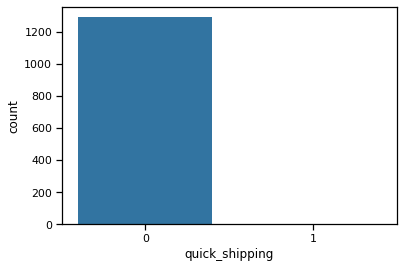

In [76]:
sns.countplot(df['quick_shipping'])

In [77]:
df['quick_shipping'].value_counts()       

0    1289
1       3
Name: quick_shipping, dtype: int64

In [78]:
df[df['quick_shipping']==1]['successful_sold'].value_counts()

0    2
1    1
Name: successful_sold, dtype: int64

In [79]:
df[df['quick_shipping']==0]['successful_sold'].value_counts()

0    807
1    482
Name: successful_sold, dtype: int64

빠른배송에 대한 뱃지가 있다고 해서 성공적인 판매랑 바로 직결되는것은 해당데이터로는 그렇다 라고 판단할 수 없을것 같다.


## 가설10. 판매자의 평가가 좋을수록 판매량이 높을 것이다.

In [80]:
df['merchant_rating'] = round(df['merchant_rating'],1)
df['merchant_rating']

0       4.1
1       3.9
2       4.0
3       4.0
4       4.0
       ... 
1287    4.0
1288    4.2
1289    4.2
1290    4.0
1291    4.2
Name: merchant_rating, Length: 1292, dtype: float64

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='merchant_rating', ylabel='count'>

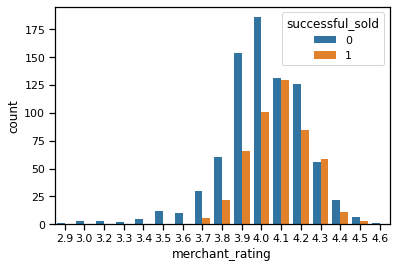

In [81]:
sns.countplot(df['merchant_rating'],hue=df['successful_sold'])

In [82]:
df['merchant_rating'].unique()

array([4.1, 3.9, 4. , 3.5, 3.7, 3.8, 4.3, 4.2, 4.4, 3.3, 4.5, 3.2, 3.6,
       3.4, 3. , 2.9, 4.6])

In [83]:
list = []
for i in df['merchant_rating']:
  if i not in list:
    list.append(i)

list

[4.1,
 3.9,
 4.0,
 3.5,
 3.7,
 3.8,
 4.3,
 4.2,
 4.4,
 3.3,
 4.5,
 3.2,
 3.6,
 3.4,
 3.0,
 2.9,
 4.6]

In [84]:
list = sorted(list)
for i in list:
  print(i,':',round(df[df['merchant_rating']==i]['successful_sold'].mean(),2))

2.9 : 0.0
3.0 : 0.0
3.2 : 0.0
3.3 : 0.0
3.4 : 0.0
3.5 : 0.0
3.6 : 0.0
3.7 : 0.17
3.8 : 0.27
3.9 : 0.3
4.0 : 0.35
4.1 : 0.5
4.2 : 0.4
4.3 : 0.51
4.4 : 0.33
4.5 : 0.3
4.6 : 0.0


판매자의 평가가 좋다고 무조건 잘팔리는것은 아니지만 상품 평점과 마찬가지로 일정평점(3.75부근)밑으로는 판매량에 마이너스 요소가 되는것으로 보인다.


판매자의 평가와 평가갯수에 따른 성공과의 상관관계 살펴보기

<AxesSubplot:>

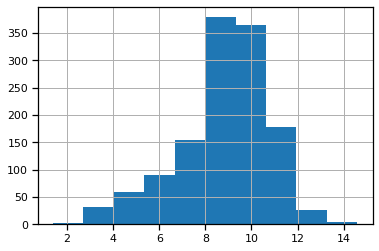

In [85]:
df['merchant_rating_count'] = np.log1p(df['merchant_rating_count'])
df['merchant_rating_count'].hist()

<AxesSubplot:xlabel='merchant_rating', ylabel='merchant_rating_count'>

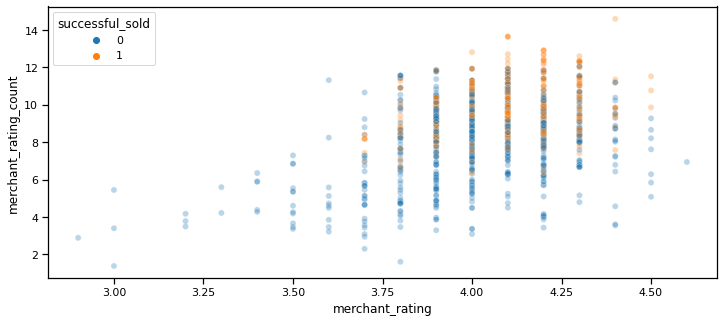

In [86]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df , x = 'merchant_rating', y = 'merchant_rating_count', hue = 'successful_sold',alpha = 0.3)

## 가설 11.	판매자의 프로필사진이 판매량을 높이는 한 요소일 것이다.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1292 non-null   object 
 1   price                         1292 non-null   float64
 2   uses_ad_boosts                1292 non-null   int64  
 3   rating                        1292 non-null   float64
 4   rating_count                  1292 non-null   float64
 5   rating_five_count             1292 non-null   float64
 6   rating_four_count             1292 non-null   float64
 7   rating_three_count            1292 non-null   float64
 8   rating_two_count              1292 non-null   float64
 9   rating_one_count              1292 non-null   float64
 10  badges_count                  1292 non-null   int64  
 11  badge_local_product           1292 non-null   int64  
 12  badge_product_quality         1292 non-null   int64  
 13  bad

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='merchant_has_profile_picture', ylabel='count'>

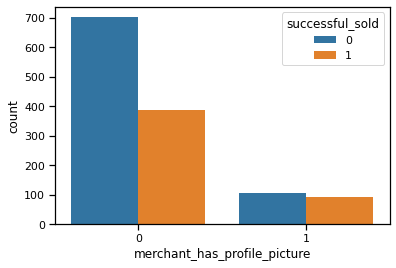

In [88]:
sns.countplot(df['merchant_has_profile_picture'], hue = df['successful_sold'])

In [89]:
df['merchant_has_profile_picture'].value_counts()

0    1091
1     201
Name: merchant_has_profile_picture, dtype: int64

In [90]:
print('프로필 없을때 성공판매비율',':',df[df['merchant_has_profile_picture']==0]['successful_sold'].mean())
print('프로필 있을때 성공판매비율',':',df[df['merchant_has_profile_picture']==1]['successful_sold'].mean())

프로필 없을때 성공판매비율 : 0.3565536205316224
프로필 있을때 성공판매비율 : 0.46766169154228854


In [91]:
# 정규성검정
from scipy.stats import ks_2samp
x = df[df['merchant_has_profile_picture']==0]['successful_sold']
y = df[df['merchant_has_profile_picture']==1]['successful_sold']

print("x와 y:",ks_2samp(x, y))


x와 y: KstestResult(statistic=0.11110807101066619, pvalue=0.027665927406198332)


In [92]:
# 윌콕슨의 순위합 검정
stats.ranksums(x, y)

RanksumsResult(statistic=-2.5062095274141285, pvalue=0.012203328050592347)

귀무가설 기각 = 둘의 평균은 같지않음

프로필이 있을때 성공적으로 판매할 확률이 높다.

## 가설 12. 판매자의 최대허용수량이 판매에 미치는 영향이 있는가?

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='product_variation_inventory', ylabel='count'>

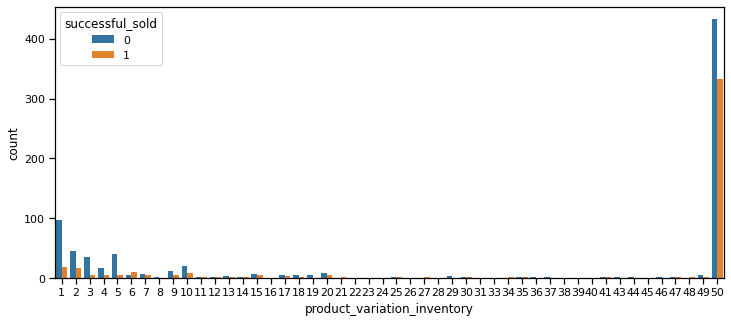

In [93]:
plt.figure(figsize = (12,5))
sns.countplot(df['product_variation_inventory'], hue= df['successful_sold'])

<AxesSubplot:>

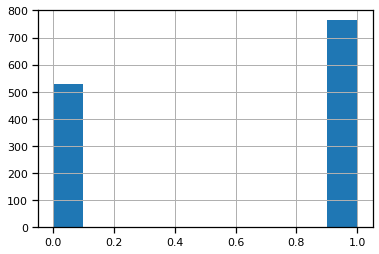

In [94]:
inven_list = []
for i in df['product_variation_inventory']:
  if i == 50:
    inven_list.append(1)
  else:
    inven_list.append(0)

df['product_variation_inventory'] = inven_list
df['product_variation_inventory'].hist()

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='product_variation_inventory', ylabel='count'>

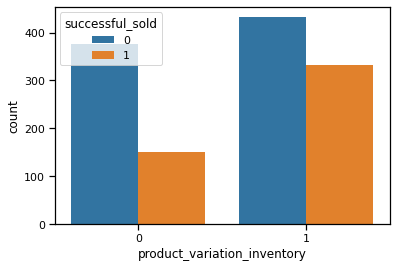

In [95]:
sns.countplot(df['product_variation_inventory'], hue= df['successful_sold'])

# 모델링

In [96]:
# 사용하지 않는 컬럼 제거
df = df.drop(columns = ['title', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'tags', 'product_color','quick_shipping', 'merchant_id', 'product_id' , 'made_in_china'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1292 non-null   float64
 1   uses_ad_boosts                1292 non-null   int64  
 2   rating                        1292 non-null   float64
 3   rating_count                  1292 non-null   float64
 4   badges_count                  1292 non-null   int64  
 5   badge_local_product           1292 non-null   int64  
 6   badge_product_quality         1292 non-null   int64  
 7   badge_fast_shipping           1292 non-null   int64  
 8   product_variation_inventory   1292 non-null   int64  
 9   shipping_option_price         1292 non-null   int64  
 10  shipped_range                 1292 non-null   int64  
 11  merchant_rating_count         1292 non-null   float64
 12  merchant_rating               1292 non-null   float64
 13  mer

In [97]:
# 컬럼별로 최대값 수치 확인
for i in df.columns:
  print(i,':',df[i].var())

price : 15.762645285412464
uses_ad_boosts : 0.24606348308005171
rating : 0.20189794552906162
rating_count : 4.3786093721425425
badges_count : 0.11924900417992629
badge_local_product : 0.02047696244301463
badge_product_quality : 0.0708087425928013
badge_fast_shipping : 0.013748432227879121
product_variation_inventory : 0.24184578638010715
shipping_option_price : 0.9005666761792164
shipped_range : 0.24796279553853426
merchant_rating_count : 3.9845374924867714
merchant_rating : 0.03851059250395091
merchant_has_profile_picture : 0.1314716314182732
successful_sold : 0.23426472386826638


In [98]:
# 컬럼별로 최대값 수치 확인
for i in df.columns:
  print(i,':',df[i].max())

price : 49.0
uses_ad_boosts : 1
rating : 5.0
rating_count : 9.940060532766969
badges_count : 3
badge_local_product : 1
badge_product_quality : 1
badge_fast_shipping : 1
product_variation_inventory : 1
shipping_option_price : 5
shipped_range : 1
merchant_rating_count : 14.592431630510214
merchant_rating : 4.6
merchant_has_profile_picture : 1
successful_sold : 1


In [99]:
# 데이터 셋 분리 
feature = df.columns.drop('successful_sold')
target = 'successful_sold'

X_train, X_test, y_train, y_test = train_test_split(df[feature], df[target], test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1033, 14), (259, 14), (1033,), (259,))

In [100]:
from scipy import stats

# 정규화(z-score)
X_train['price'] = stats.zscore(X_train['price'])
X_test['price'] = stats.zscore(X_test['price'])

In [101]:
X_train

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1067,1.088202,0,4.1,6.368187,0,0,0,0,1,3,0,8.753056,4.2,0
966,0.841367,1,3.6,3.931826,0,0,0,0,0,3,0,8.232972,3.8,0
803,1.088202,0,4.1,6.769642,0,0,0,0,1,3,1,9.712569,4.0,0
339,1.335037,1,4.1,4.110874,0,0,0,0,0,3,1,6.745236,3.7,0
667,-0.145975,0,4.1,7.180070,0,0,0,0,1,2,0,8.903408,4.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.639645,1,3.8,6.918695,0,0,0,0,1,2,0,9.274816,4.1,0
1095,0.594531,0,3.9,6.190315,0,0,0,0,1,2,1,8.525756,4.1,0
1130,-0.886481,1,4.1,3.433987,0,0,0,0,1,2,1,10.689146,4.1,0
860,0.100861,1,4.3,6.626718,1,0,1,0,1,3,1,9.799792,4.1,0


In [102]:
X_test

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture
351,0.797514,0,3.9,7.952263,0,0,0,0,0,3,1,9.423191,3.9,0
486,-0.314497,1,4.5,7.516977,1,0,1,0,1,2,1,9.074292,4.2,0
599,-0.314497,0,3.7,3.871201,0,0,0,0,1,2,0,9.778831,4.1,1
442,2.743533,0,4.6,3.555348,2,1,0,1,0,5,1,7.290293,4.2,1
270,0.797514,0,3.7,3.135494,0,0,0,0,0,3,1,7.465655,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-0.870503,0,4.1,4.553877,0,0,0,0,1,2,1,9.253112,4.0,0
723,-0.592500,0,4.0,3.583519,0,0,0,0,1,2,0,8.085179,3.8,0
425,-0.314497,0,4.1,6.093570,0,0,0,0,1,2,1,7.222566,4.1,0
10,-0.650881,0,3.5,6.419995,0,0,0,0,0,2,0,9.155990,4.0,0


In [103]:
for i in X_train.columns:
  print(i,':',X_train[i].max())

price : 9.974274020291933
uses_ad_boosts : 1
rating : 5.0
rating_count : 9.940060532766969
badges_count : 2
badge_local_product : 1
badge_product_quality : 1
badge_fast_shipping : 1
product_variation_inventory : 1
shipping_option_price : 5
shipped_range : 1
merchant_rating_count : 14.592431630510214
merchant_rating : 4.6
merchant_has_profile_picture : 1


In [104]:
for i in X_train.columns:
  print(i,':',X_train[i].var())

price : 1.000968992248062
uses_ad_boosts : 0.24714086314415004
rating : 0.19435076581342817
rating_count : 4.399683746904339
badges_count : 0.11184027855947529
badge_local_product : 0.01807222134672099
badge_product_quality : 0.07151594287729723
badge_fast_shipping : 0.014323825390035795
product_variation_inventory : 0.24095544699340368
shipping_option_price : 0.9039281238509047
shipped_range : 0.2483847002408879
merchant_rating_count : 3.9592507177198493
merchant_rating : 0.038841786923013426
merchant_has_profile_picture : 0.1323589004705194


In [105]:
# 랜덤 포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 파이프라인 생성 및 학습
pipe = make_pipeline(
    RandomForestClassifier(random_state = 42, n_jobs = -1,n_estimators=200, max_depth=10,min_samples_leaf= 4)
)

pipe.fit(X_train, y_train)
 
# 지수화
X_test[['rating_count', 'merchant_rating_count']] = np.expm1(X_test[['rating_count', 'merchant_rating_count']])

# 예측
y_pred = pipe.predict(X_test)




# 결과확인

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.44787644787644787
1.0
0.39915966386554624
0.5705705705705706


rating_count                    0.050193
price                           0.000000
uses_ad_boosts                  0.000000
rating                          0.000000
badges_count                    0.000000
badge_local_product             0.000000
badge_product_quality           0.000000
badge_fast_shipping             0.000000
product_variation_inventory     0.000000
shipping_option_price           0.000000
shipped_range                   0.000000
merchant_rating_count           0.000000
merchant_rating                 0.000000
merchant_has_profile_picture    0.000000
dtype: float64

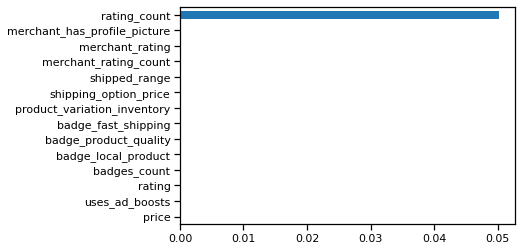

In [106]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter생성
permuter = PermutationImportance(
    pipe,
    scoring = 'neg_mean_absolute_error',
    n_iter = 3,
    random_state = 42
)

# 순열중요도 계산
permuter.fit(X_test, y_test)

# 결과확인
feature_names = X_test.columns

importances = pd.Series(permuter.feature_importances_, feature_names)

importances.sort_values().plot.barh();
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

# 시스템 구축

In [107]:
# # 정보 받기
# a = input("정보를 입력해 주세요(띄어쓰기)").split()
# # array 정보로 변경
# list = np.array(a)
# list = list.reshape(1,14)
# # 데이터프레임으로 이동
# test_sample = pd.DataFrame(data = list, columns = ['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
#       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
#       'product_variation_inventory', 'shipping_option_price', 'shipped_range',
#       'merchant_rating_count', 'merchant_rating',
#       'merchant_has_profile_picture'])
# # 출력
# test_sample

In [111]:
from scipy import stats
# 정보 받기
a,b,c,d,e,f,g,h,i,j,k,l,m,n = map(float,input("정보를 입력해 주세요 : ").split('/'))
list = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n])
list = np.round(list.astype('float32'),1)
list = list.reshape(1,14)
# 데이터프레임으로 이동
test_sample = pd.DataFrame(data = list, columns = ['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
      'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
      'product_variation_inventory', 'shipping_option_price', 'shipped_range',
      'merchant_rating_count', 'merchant_rating',
      'merchant_has_profile_picture'])


# 전처리
test_sample['rating'] = round(test_sample['rating'],1)
test_sample['product_variation_inventory'] = [1 if i == 50 else 0 for i in test_sample['product_variation_inventory']]
test_sample['shipping_option_price'] = [5 if i >=5 else i for i in test_sample['shipping_option_price']]
test_sample['merchant_rating'] = round(test_sample['merchant_rating'], 1)


# 판매 예측
test_pred = pipe.predict(test_sample)

if test_pred ==0:
  print('★★성공적으로 판매하지 못할것 같습니다.★★\n********************************************************'.center(97))
  print('---[최적화 도우미]---'.center(48),end='\n')
else:
  print('★★성공적으로 판매할 것 같습니다.★★\n********************************************************'.center(97))
  print('---[최적화 도우미]---'.center(48),end='\n')
if test_sample['rating'][0]<3.4:
  print('★상품 평점 관리를 해주세요★'.center(40))
if test_sample['rating_count'][0]<600:
  print('★상품 평가 수를 늘려보세요★'.center(40))
if test_sample['product_variation_inventory'][0]!=1:
  print('★최대 허용 수량을 늘려보세요★'.center(40))
if test_sample['merchant_rating_count'][0]<100 and test_sample['merchant_rating'][0]<100:
  print('★판매자 평점, 평가수 관리 해주세요★'.center(36))
if test_sample['merchant_has_profile_picture'][0] !=1:
  print('★판매자 프로필 관리를 해보세요★'.center(36))

정보를 입력해 주세요 : 8/1/3.15/6/0/0/0/0/50/2/41/12/3.1125/0
        ★★성공적으로 판매하지 못할것 같습니다.★★
********************************************************        
                ---[최적화 도우미]---                 
            ★상품 평점 관리를 해주세요★            
            ★상품 평가 수를 늘려보세요★            
       ★판매자 평점, 평가수 관리 해주세요★        
         ★판매자 프로필 관리를 해보세요★         


테스트용 데이터 : 8/1/3.15/6/0/0/0/0/50/2/41/12/3.1125/0

In [109]:
test_sample.columns

Index(['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price', 'shipped_range',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

In [110]:
test_sample['rating'][0]<3.4

True

In [111]:
test_sample

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipped_range,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.0,1.0,3.2,6.0,0.0,0.0,0.0,0.0,1,2.0,41.0,12.0,3.1,0.0
